<font color='red' size=5><b>Сегментирование пользователей банка</b></font>

# Материалы

Чтобы увидеть новую презентацию, нужно нажать на эту кнопочку -  **[ТУТЬ](https://drive.google.com/file/d/1uZseh6LpZblNjQSUQEptZ66ZlyT1FSDX/view?usp=sharing)**


# Оглавление:

1. [Шаг 1. Откроем файл с данными и изучим общую информацию](#one)


2. [Шаг 2. Предобработка данных](#two)
    * [Замена названий столбцев](#three)
    * [Работа с дубликатами](#four)
    * [Работа с пропусками](#six)
    * [Меняем тип данных](#five)
    
    
3. [Шаг 3. Исследовательский анализ данных](#seven)


4. [Шаг 4. Статистический анализ данных](#eight)
    * [Первая гипотеза](#nine)
    * [Вторая гипотеза](#ten)


5. [Шаг 5. Подведение итогов и формирование рекомендаций для банка](#eleven)

# Шаг 1. Открыть файл с данными и изучить общую информацию
<a id='one'></a>

Для работы с данными нам нужно импортировать библиотеки, которые понадобятся нам для дальнейшей работы.

In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки scipy
from scipy import stats as st
# импорт библиотеки BytesIO
from io import BytesIO
# импорт библиотеки requests
import requests
# импорт библиотеки warnings
import warnings
warnings.filterwarnings("ignore") 
# импорт библиотеки phik
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report
# импорт библиотеки sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
#добавление класса для шрифта
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

Теперь мы можем приступить к чтению файла. Прежде всего нам необходимо встроить сторонний файл с данными в проект - мы загрузим его в гугл-таблицы, а затем прочтем ссылку на таблицу.

In [3]:
#встраиваем файл в проект
spreadsheet_id = '1WLWpx_x7QT8Ig9K0Y7qfl6HgPDQ2Xa0bhTKLKhco6CE'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
#присваиваем переменной значение датасета
bank_df = pd.read_csv(BytesIO(r.content))

Теперь посмотрим на сам датасет и общую информацию о нем, на основе полученных данных сделаем предварительные выводы.

In [4]:
#выведем первые 5 строк таблицы на экран
bank_df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


В датасете 12 столбцев. Согласно документации к данным:

**1)** ***`userid`*** — идентификатор пользователя,


**2)** ***`score`*** — баллы кредитного скоринга,

**3)** ***`City`*** — город,

**4)** ***`Gender`*** — пол,

**5)** ***`Age`*** — возраст,

**6)** ***`Objects`*** — количество объектов в собственности,

**7)** ***`Balance`*** — баланс на счёте,

**8)** ***`Products`*** — количество продуктов, которыми пользуется клиент,

**9)** ***`CreditCard`*** — есть ли кредитная карта,

**10)** ***`Loyalty`*** — активный клиент,

**11)** ***`estimated_salary`*** — заработная плата клиента,

**12)** ***`Churn`*** — ушёл или нет.    

В каждой строке таблицы представлены данные о клиентах банка.

Мы сразу видим, что названия столбцев не соответсвуют правилам хорошего стиля - нужно привести их к нижнему регистру.

In [5]:
#получим общую информацию о датасете
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Мы видим, что в столбце Balance около 37% пропусков - целых 3617. Тип данных в столбцах без деффектов - хотя для упрощение и стандартизации данных мы могли бы перевести пол в двоичную систему, а все значения типа float перевести в тип int.

In [6]:
# получение дполнительной информации о данных в таблице 
bank_df.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Мы видим средние значения столбцев:

1) **score** (баллы кредитного скоринга) - 650 (минимум - 350, а максимум - 850). В среднем можно сказать, что клиенты банка довольно надежны.

2)  **Age** (возраст) - 38 лет. Довольно высокий возрастной порог.

3)  **Objects** (количество объектов в собственности) - 5 объектов в собственноости. 

4)  **Balance** (баланс на счёте) - 119827 у.е. При этом мы видим, что минимум - 3768.

5)  **Products** (количество продуктов, которыми пользуется клиент) - 1.5  Минимум здесь - 1, а максимум - 4. Значит, мы получим 4 сегмента.

6)  **CreditCard** (есть ли кредитная карта) - у 70% клиентов есть кредитки.  

7)  **Loyalty** (активный клиент) - около 52% клиентов можно считать активными.

8)  **estimated_salary** (заработная плата клиента) - 100090. Минимальный заработок - 11 у.е.

9) **Churn** (отток) - всего ушло 20% клиентов, что относительно немного.

# Шаг 2. Предобработка данных
<a id='two'></a>

На данном этапе нам предстоит разобраться с данными. 

## Замена названий столбцев
<a id='three'></a>

Просто создадим список с новыми названиями столбцев. Мы могли бы просто привести данные к нулевому регистру специальной функцией, но в в названиях имеются проблемы не только с регистром, а потому более выгодным вариантом кажется обычный список с названиями.

In [7]:
#меняем названия столбцев
bank_df.columns = (['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'])
# получение первых 10 строк таблицы 
bank_df.head(5)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Теперь названия нормализированы.

## Работа с дубликатами
<a id='four'></a>

Проверим, есть ли в датасете дубликаты

In [8]:
#считаем дубликаты
bank_df.duplicated().sum()

0

Дубликатов в датасете нет, что очень хорошо.

## Работа с пропусками
<a id='six'></a>

Мы уже знаем, что в данных есть пропуски - убедимся в этом.

In [9]:
# подсчёт пропусков
bank_df.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Как мы и говорили, всего лишь в одном столбце есть пропуски, однако их довольно много. В данном случае мы говорим о столбце balance, который нам указывает то, сколько денег находится на карте у клиента. Однако почему-то у некоторых клиентов в данном поле стоит пропуск. Почему такое могло произойти? Можно попробовать выдвинуть различные гипотезы, но для начала попробуем проанализировать клиентов со пропусками в балансе на карте. Для этого мы сделаем срез.

In [10]:
#клиенты с пропусками
bank_nan = bank_df[bank_df['balance'].isna()]
#посмотрим, есть ли какие-нибудь закономерности между пропуском и признаками клиентов
bank_nan.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,3.617000e+03,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
std,7.194749e+04,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195
min,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.567226e+07,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,1.573608e+07,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,1.579629e+07,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000
max,1.585810e+07,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000


Каких-то нестандартных значений признаков мы не наблюдаем. Следовательно каких-то закономерностей нет. Посмотрим на значение категориальных переменных - начнем с города.

In [11]:
#уникальные значения столбца city для всей таблицы
bank_df['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

In [12]:
#уникальные значения столбца city
bank_nan['city'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

Посмотрим и на распределение по количеству продуктов перед сегментацией.

In [13]:
#уникальные значения столбца products для всей таблицы
bank_df['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

In [14]:
#уникальные значения столбца products
bank_nan['products'].value_counts()

2    2600
1     905
3      98
4      14
Name: products, dtype: int64

Посмотрим на такие данные по гендеру

In [15]:
#уникальные значения столбца gender для всей таблицы
bank_df['gender'].value_counts()

М    5457
Ж    4543
Name: gender, dtype: int64

In [16]:
#уникальные значения столбца gender
bank_nan['gender'].value_counts()

М    1963
Ж    1654
Name: gender, dtype: int64

Теперь смотрим на объекты.

In [17]:
#уникальные значения столбца objects для всей таблицы
bank_df['objects'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

In [18]:
#уникальные значения столбца objects
bank_nan['objects'].value_counts()

7     386
2     382
5     374
4     369
6     367
8     363
9     360
3     352
1     349
10    178
0     137
Name: objects, dtype: int64

Теперь посмотрим на кредитные карты

In [19]:
#уникальные значения столбца credit_card для всей таблицы
bank_df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

In [20]:
#уникальные значения столбца credit_card
bank_nan['credit_card'].value_counts()

1    2592
0    1025
Name: credit_card, dtype: int64

Теперь посомотрим на лояльность

In [21]:
#уникальные значения столбца loyalty для всей таблицы
bank_df['loyalty'].value_counts()

1    5151
0    4849
Name: loyalty, dtype: int64

In [22]:
#уникальные значения столбца loyalty
bank_nan['loyalty'].value_counts()

1    1873
0    1744
Name: loyalty, dtype: int64

Посмотрим на отток

In [23]:
#уникальные значения столбца churn для всей таблицы
bank_df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [24]:
#уникальные значения столбца churn
bank_nan['churn'].value_counts()

0    3117
1     500
Name: churn, dtype: int64

Мы видим, что пропуски характерны для клиентов со всевозможным количеством продуктов.

Интересное замечание - в полученном датасете всего 2 города, в то время как банк функционирует в 3 городах. Пропусков в городе Ростов Великий мы не видим. В Рыбинске и Ярославле половина клиентов осталась без баланса. Крайне много пропусков для клиентов с 2 продуктами.

Можем попробовать выдвинуть следующие гипотезы:

**1)** Произошел сбой в системе, собирующей информацию о клиентах, а потому и часть данных либо не собралась, либо была потеряна. Сбой имел локальный характер и произошел только в городах Ярославль и Рыбинск. Восстановить данные пропуски будет проблематично - можно, конечно, категоризировать данные и для каждой категории данныз попробовать найти среднее или медианное значение баланса, но баланс это индивидуальное значение - у клиента деньги могут храниться наличными или в какой-то момент не быть денег на карте. Невозможно хотя бы приблизительно рассчитать потерянные значения при подобной гипотезе.

**2)** Как было замечено в датасете отстутсвуют клиенты, у которых баланс равнялся бы 0. Возможно пропуски в датасете появились по той причине, что баланс у данных клиентов был пустой. Эта гипотеза более гибкая. Если это так, то мы можем вполне уверенно заменить все пропуски нулями. Поскольку данная гипотеза более осуществима, мы ее и возьмем в качестве основной.

**3)** Касаемо пола, тут нет каких-то особенностей - пропуски распределеились равномерно по полу. Значит, пропуски не зависят от пола.

**4)** Говоря об объектах, мы можем заметить, что каких-то нестандартных проявлений незаметно. Много пропусков мы видим среди тех, кто обладает 0 и 10 объектами, но связано это с тем, что таких клиентов значительно меньше других. Как таковой зависимости нет.

**5)** Среди клиентов, у которых были кредитки и тех, у кого не было кредиток, равномерно распределились пропуски и составили процентов 34-37.

**6)** Касаемо активности, тоже мы видим, что нет никакой корреляции между существованием пропусков и активностью клиента.


**7)** Среди тех, кто не попал в отток, больше пропусков, чем среди тех, кто попал в отток - не очень много, но заметно.

In [25]:
#заменим пропуски нулями
bank_df = bank_df.fillna(0)
# подсчёт пропусков
bank_df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
objects             0
balance             0
products            0
credit_card         0
loyalty             0
estimated_salary    0
churn               0
dtype: int64

## Меняем тип данных
<a id='five'></a>

Сначала стандартизируем пол - переведем его в двоичную систему, где Мужской пол будет 1, а Женский 0.

In [26]:
#создадим собственную функцию для перевода
def gender_kod(row):
    if row == "М":
        row = 1
    else:
        row = 0
    return row

In [27]:
#применяем функцию
bank_df['gender'] = bank_df['gender'].apply(gender_kod)
#выводим количество уникальных значений полученного столбца
bank_df['gender'].value_counts()

1    5457
0    4543
Name: gender, dtype: int64

Все получилось. Теперь приведем все значения к целочисленному типу.

In [28]:
#приводим к целочисленному типу
bank_df[['balance', 'estimated_salary']] = bank_df[['balance', 'estimated_salary']].astype('int')
#проверим результат работы
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           10000 non-null  int64 
 1   score             10000 non-null  int64 
 2   city              10000 non-null  object
 3   gender            10000 non-null  int64 
 4   age               10000 non-null  int64 
 5   objects           10000 non-null  int64 
 6   balance           10000 non-null  int64 
 7   products          10000 non-null  int64 
 8   credit_card       10000 non-null  int64 
 9   loyalty           10000 non-null  int64 
 10  estimated_salary  10000 non-null  int64 
 11  churn             10000 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 937.6+ KB


Теперь этап предобрботки завершен. Данные готовы к анализу.

# Шаг 3. Исследовательский анализ данных
<a id='seven'></a>

На этом этапе мы проведем основную часть работы - проведем деление на сегменты.

In [29]:
#посмотрим, сколько получится сегментов
bank_df['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

Сделаем эти цифры более визуальными:

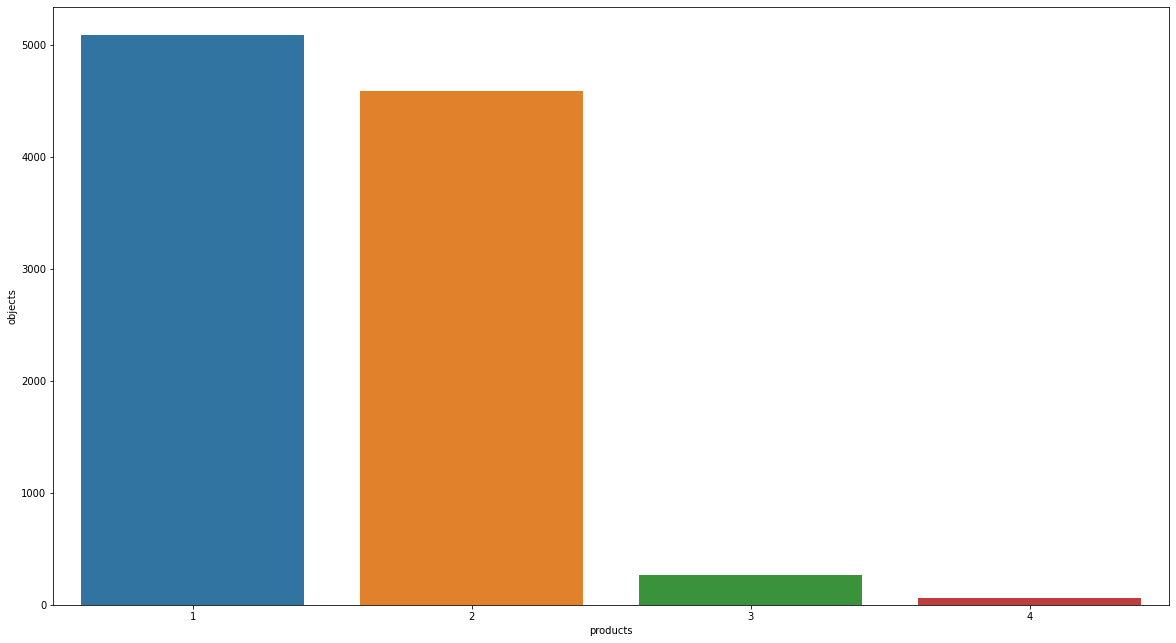

In [30]:
#посчитаем количество клиентов каждого сегмента
bank_df1 = bank_df.groupby("products", as_index=False).count()
#размер фигуры
plt.figure(figsize=(20, 11))
#визуализируем!
sns.barplot(x='products', y='objects', data=bank_df1) 
#указываем заглавие
plt.show()



Мы видим, что получилось 4 сегмента. Однако они не равны по размерам. Различие довольно велико.

Прежде всего мы начнем с группировки данных по количеству потребляемых прдуктов. Признаки в датасете можно условно разделить на 2 группы - категориальные и количественные, а уже для каждой из групп построить графики.

In [31]:
#создадим списки категориальных и количественных признаков для того, чтобы построить гистограммы и диаграммы распределения
quality = ['score', 'age', 'objects', 'balance', 'estimated_salary']
sign = ['city','gender', 'credit_card', 'loyalty', 'churn']

Мы построим собственные функции, чтобы с их помощью сегментировать пользователей по количеству продуктов и заодно визуализировать распределение признаков для всех сегментов.

Начнем с функции для визуализации количественных признаков одновременной сгементизации клиентов.

In [32]:
#функция будет принимать датасет, список количественных признаков, размеры и количество ячеек
def distribution(bank_df, quality, size_x, size_y, binss):
    #делим датасет на сегменты
    segment_1 = bank_df.query('products ==1')
    segment_2 = bank_df.query('products ==2')
    segment_3 = bank_df.query('products ==3')
    segment_4 = bank_df.query('products ==4')
    #строим для достаточной ясности датасет со средними значениями признаков для каждого сегмента
    bank_segments_mean = bank_df[['score', 'age', 'objects', 'balance', 'estimated_salary', 'products']].groupby('products').mean()
    print(color.BOLD +'Средние значения признаков' + color.END)
    display(bank_segments_mean)
    #строим для достаточной ясности датасет с медианными значениями признаков для каждого сегмента
    bank_segments_median = bank_df[['score', 'age', 'objects', 'balance', 'estimated_salary', 'products']].groupby('products').median()
    print(color.BOLD +'Медианные значения признаков' + color.END)
    display(bank_segments_median)
    #строим цикл для каждого признака
    for k in quality:
        print(color.BOLD +'Распределение оттока для признака:', k + color.END)
        plt.figure(figsize=(size_x, size_y))
        sns.distplot(segment_1[k], bins = binss, label = 'segment =1') 
        sns.distplot(segment_2[k], bins = binss, label = 'segment =2') 
        sns.distplot(segment_3[k], bins = binss, label = 'segment =3') 
        sns.distplot(segment_4[k], bins = binss, label = 'segment =4') 
        plt.legend()
        plt.show()


Теперь посмотрим на то, как распределены категориальные признаки.

Средние значения признаков


,score,age,objects,balance,estimated_salary
products,,,,,
1,649.120968,39.673092,4.974626,98551.457907,99486.761015
2,652.188671,37.753595,5.051852,51878.933987,100451.524183
3,648.105263,43.195489,5.003759,75458.000000,104317.684211
4,653.583333,45.683333,5.300000,93732.800000,104763.183333


Медианные значения признаков


,score,age,objects,balance,estimated_salary
products,,,,,
1,651.0,38.0,5.0,111885.5,99226.0
2,653.0,36.0,5.0,0.0,100738.5
3,650.0,42.0,5.0,95973.5,101046.5
4,643.0,45.0,5.0,116808.0,112162.5


Распределение оттока для признака: score


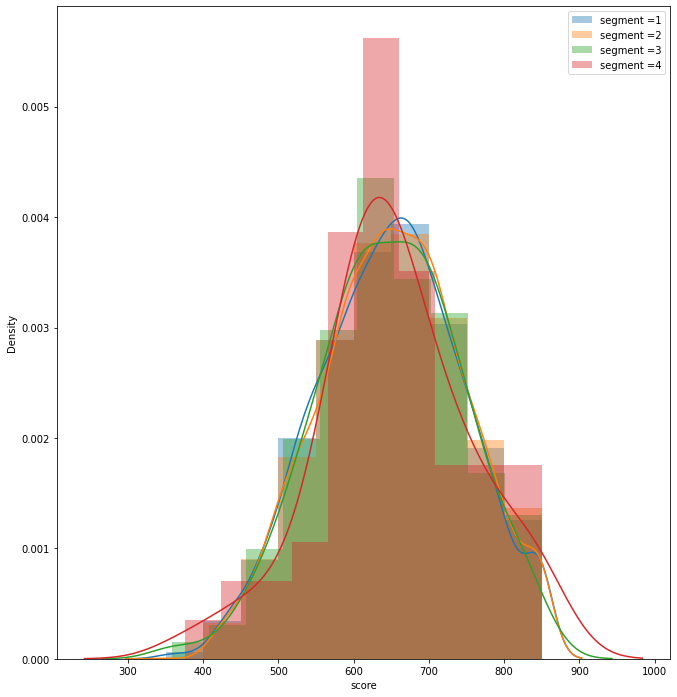

Распределение оттока для признака: age


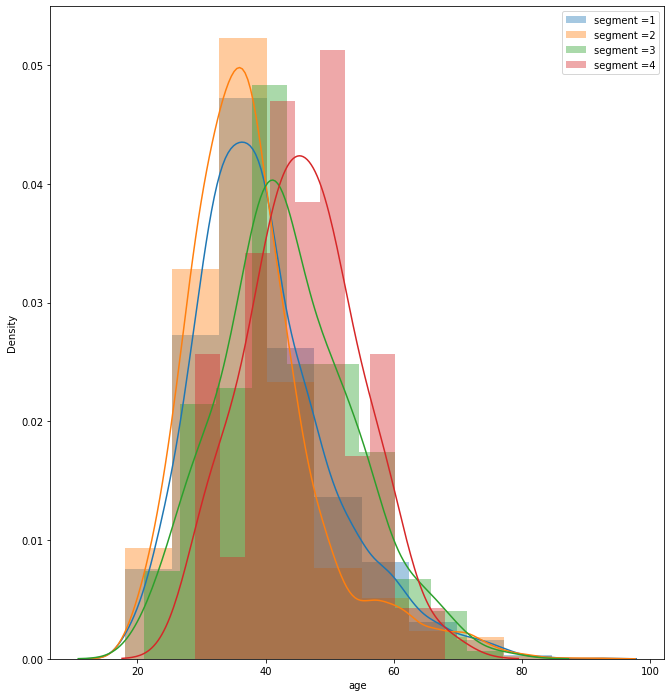

Распределение оттока для признака: objects


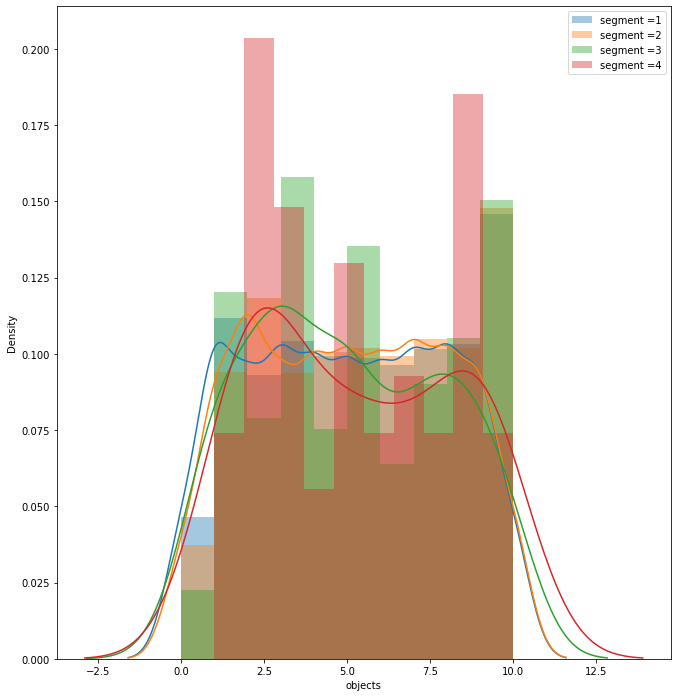

Распределение оттока для признака: balance


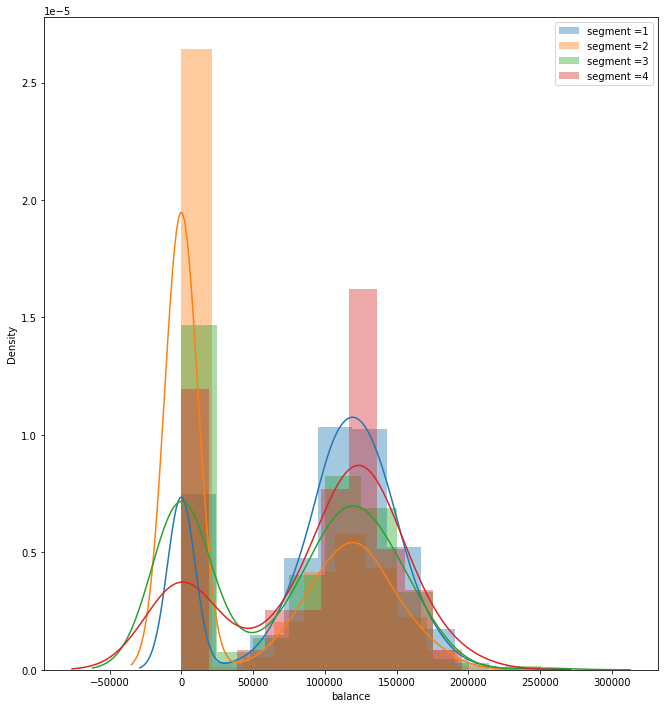

Распределение оттока для признака: estimated_salary


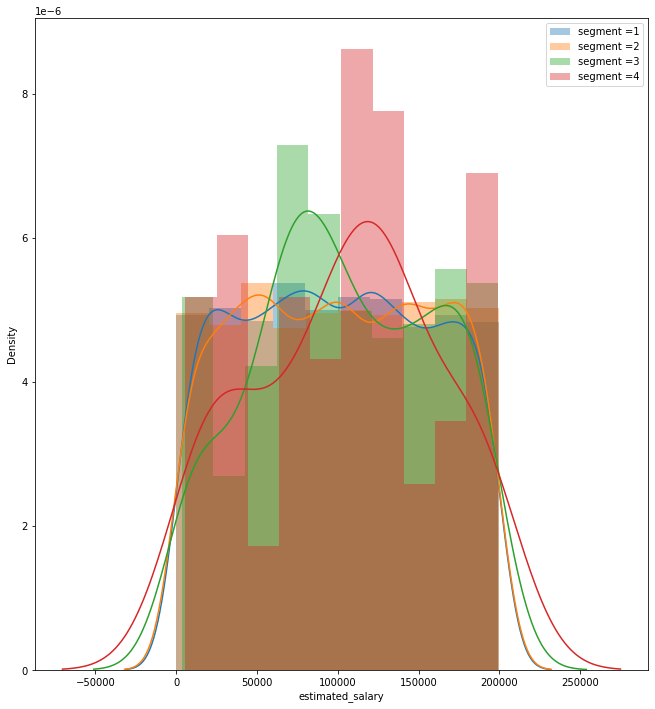

In [33]:
#применяем функцию
distribution(bank_df, quality, 11, 12, 10)

Мы видим следующее:

**1)** Признак **`score`** - баллы кредитного скоринга

В целом для всех сегментов он довольно однообразен. Средние и межианные значения колеблятся в пределах 650. На графике распределения видно, что по данному покзаателю сегменты похожи.

**2)** Признак **`age`** - возраст

Сегменты различаются по данному признаку. Самый старый сегмент - 4 (пользователи, которые обладат 4 продуктами), для них средний и медианный возраст составляет 45 лет. Довольно мало людей среди данного сегмента, которые были бы младше 25-30 лет. Второй по старости сегмент - пользователи, обладающие 3 продуктами банка (средний и медианный возраст - 43 и 42 года). Третий по старости сегмент - пользователи, обладающие 1 продуктом (средний и медианный возраст для них 39 и 38 лет). В сравнении с двумя предыдущими сегментами заметен на графике сдвиг к границе 20 лет. Самый же молодой сгемент - клиенты, купившие 2 продукта (37 и 36 лет их средний и медианный возраст). Данный сегмент на графике схож с 1, однако у него чуть больше молодых клиентов, а на уровне 40 лет заметно падение количества клиентов.

**3)** Признак **`objects`** -  количество объектов в собственности

Средние и медианные показатели говорят о схожести сегментов по данному критерию. По графику тоже незаметно какого-либо аномального поведения клиентов в зависимости от сегмента.

**4)** Признак **`balance`** -  баланс на счёте

Средние и медианные значения баланса различаются по сегментам. Для 1 и 4 сегмента характерны высокие показатели баланса. 3 сегмент имеет чуть меньший баланс, а 2 сегмент имеет самый небольшой баланс. Медианные же значения такие же, однако медианные значения для 2 сегмента упали в 0 вообще, что оправдывается нашей заеной пропусков, что означает то, что больше половины клиентов 2 сегмента имели пропуски в значении баланса. Графики все это подтверждают. Можно также отметить, что все 4 сегмента имели пропуски, которые были заменены 0, но 2 сегмент имел их больше остальных, а 4 меньше остальных. 1 сегмент имел довльно много пропусков, однако он также имел большую часть клиентов, которые имеют высокий баланс. 2 сегмент ко всему прочему имеет не только больше всех пропусков, но и самый низкий уровень баланса.

**5)** Признак **`estimated_salary`** -  заработная плата клиента

По заработной плате сегменты примерно равны. 1 и 2 сегменты чуть хуже остальных. 4 сегмент имеет чуть больше клиентов, которые имели более высокую заработноую плату.

На баланс очень сильно повлияло наша работа с проусками, а потому построим график для баланса, но уже в срезе.

products
1    119893.661642
2    119660.455779
3    119475.166667
4    122260.173913
Name: balance, dtype: float64

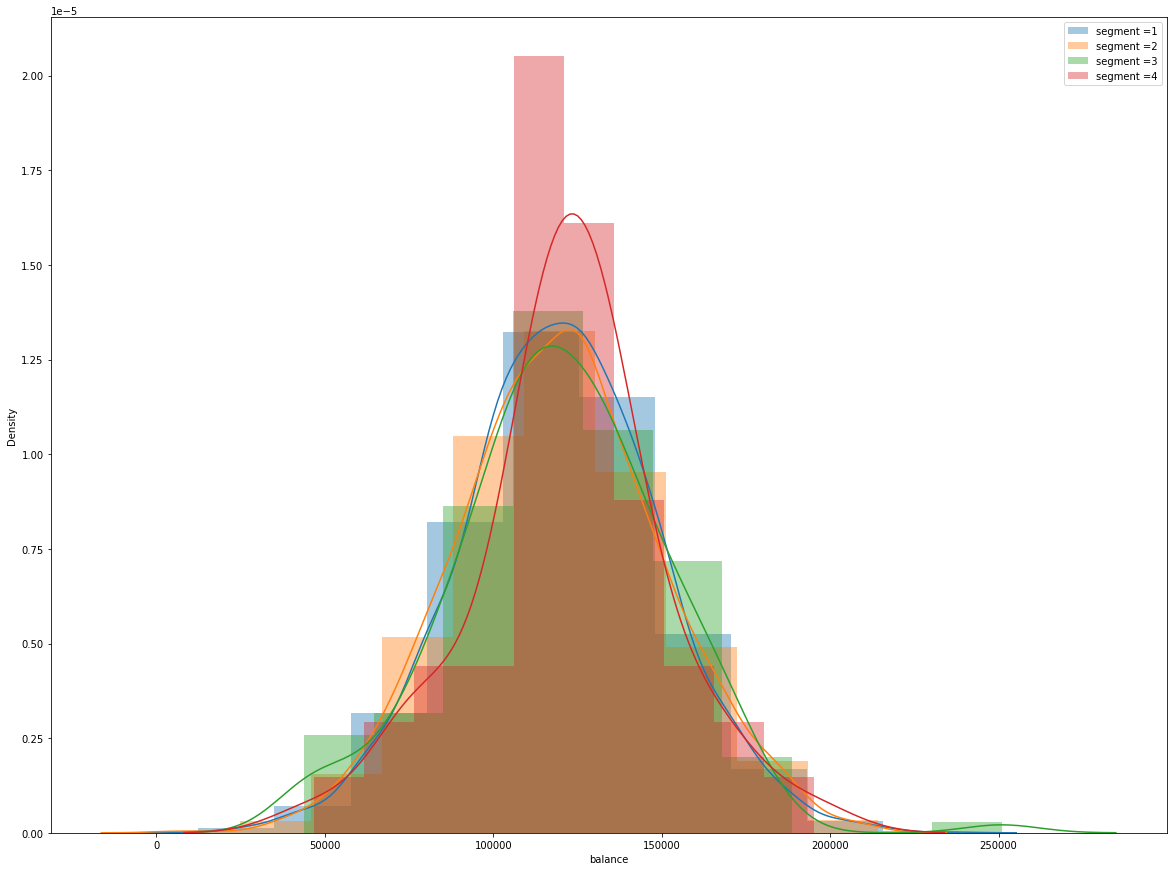

In [34]:
bank_segments_means = bank_df.query('balance!=0').groupby('products')['balance'].mean()
display(bank_segments_means)
segment_1 = bank_df.query('products ==1 & balance!=0')
segment_2 = bank_df.query('products ==2 & balance!=0')
segment_3 = bank_df.query('products ==3 & balance!=0')
segment_4 = bank_df.query('products ==4 & balance!=0')
plt.figure(figsize=(20, 15))
sns.distplot(segment_1['balance'], bins = 10, label = 'segment =1') 
sns.distplot(segment_2['balance'], bins = 10, label = 'segment =2') 
sns.distplot(segment_3['balance'], bins = 10, label = 'segment =3') 
sns.distplot(segment_4['balance'], bins = 10, label = 'segment =4') 
plt.legend()
plt.show()


Самый высокий баланс у 1 сегмента. Для 4 сегмента баланс находится на 2 месте по величине. 3 сегмент похуже 1 и 4 сегмента, но не самый низкий баланс имеет. Самый низкий баланс у 2 сегмента.

Создадим теперь функцию для визиализи количественных переменных.

In [35]:
#создаем собственную функцию для построения таблиц распределения признаков и их визуализации
#задаем 4 входные перменные - таблицу, список, размер таблицы по горизонтали и вертикали
def histograms(bank_df, sign, size_x, size_y):
    #создаем таблицу для работы
    bank_hist = bank_df.copy()
    #создаем дополнительный столбец с данными продукте, чтобы при группировке мы не потеряли данные
    bank_hist['segment_for_hist'] = bank_hist['products']
    #создаем цикл для каждого признака из списка, чтобы можно было строить датасет по каждому признаку
    for e in sign:
        #группируем таблицу по признаку и сегменту, считая количество клиентов для каждой группы
        bank_for_sign = bank_hist.groupby(['products', e], as_index=False)['segment_for_hist'].count()
        #создаем столбец для записи туда процентов и заполняем его случайным числом - пусть будет единица
        bank_for_sign['percent'] = 1
        #переводим значения типа столбца в тип float, чтобы можно было получить проценты
        bank_for_sign['percent'] = bank_for_sign['percent'].astype('float')
        #строим еще один цикл для работы с ячейками, где переменная будет принимать номер строки
        for x in range(len(bank_for_sign)):
            #строим цикл, где переменная будет принимать уникальное значение качественной переменной.
            #можно было бы обойтись без этого шага, но так мы автоматизировали функцию
            for g in bank_df['products'].unique():
                #если значение ячейки полученных групп равно одному из уникальных значений
                if bank_for_sign['products'][x] ==g:
                    #то мы рассчитываем переменную, в которую войдет общее количество клиентов группы, а затем уже находим доли
                    c = bank_for_sign.groupby('products')['segment_for_hist'].sum()
                    bank_for_sign['percent'][x] = round(bank_for_sign['segment_for_hist'][x]/c[g], 2)
                else:
                    #в противном случае оставляем переменную без изменения
                    bank_for_sign['percent'][x] = bank_for_sign['percent'][x]
        #выводим полученные таблицы
        print('')
        print(color.BOLD +'Доля пользователей по сегментам для принака:', e + color.END)
        display(bank_for_sign)
        print('')
        #определяем размер таблицы
        plt.figure(figsize=(size_x, size_y))
        #визуализируем!
        sns.barplot(x='products', y='percent', hue= e, data=bank_for_sign) 
        #указываем легенды
        plt.legend()
        #указываем заглавие
        plt.title(f'Доля пользователей по сегментам для принака: {e}')
        plt.show()

Теперь посмотрим на то, что у нас получилось


Доля пользователей по сегментам для принака: city


,products,city,segment_for_hist,percent
0,1,Ростов Великий,1349,0.27
1,1,Рыбинск,1221,0.24
2,1,Ярославль,2514,0.49
3,2,Ростов Великий,1040,0.23
4,2,Рыбинск,1183,0.26
5,2,Ярославль,2367,0.52
6,3,Ростов Великий,96,0.36
7,3,Рыбинск,66,0.25
8,3,Ярославль,104,0.39
9,4,Ростов Великий,24,0.40


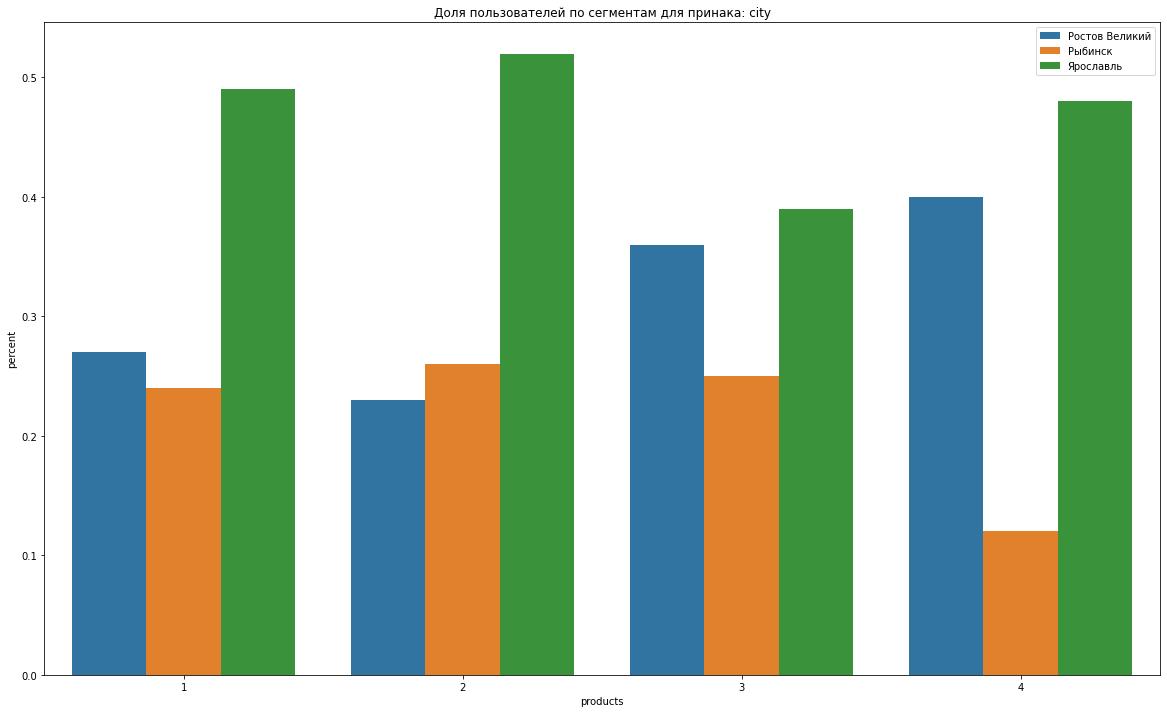


Доля пользователей по сегментам для принака: gender


,products,gender,segment_for_hist,percent
0,1,0,2296,0.45
1,1,1,2788,0.55
2,2,0,2060,0.45
3,2,1,2530,0.55
4,3,0,149,0.56
5,3,1,117,0.44
6,4,0,38,0.63
7,4,1,22,0.37


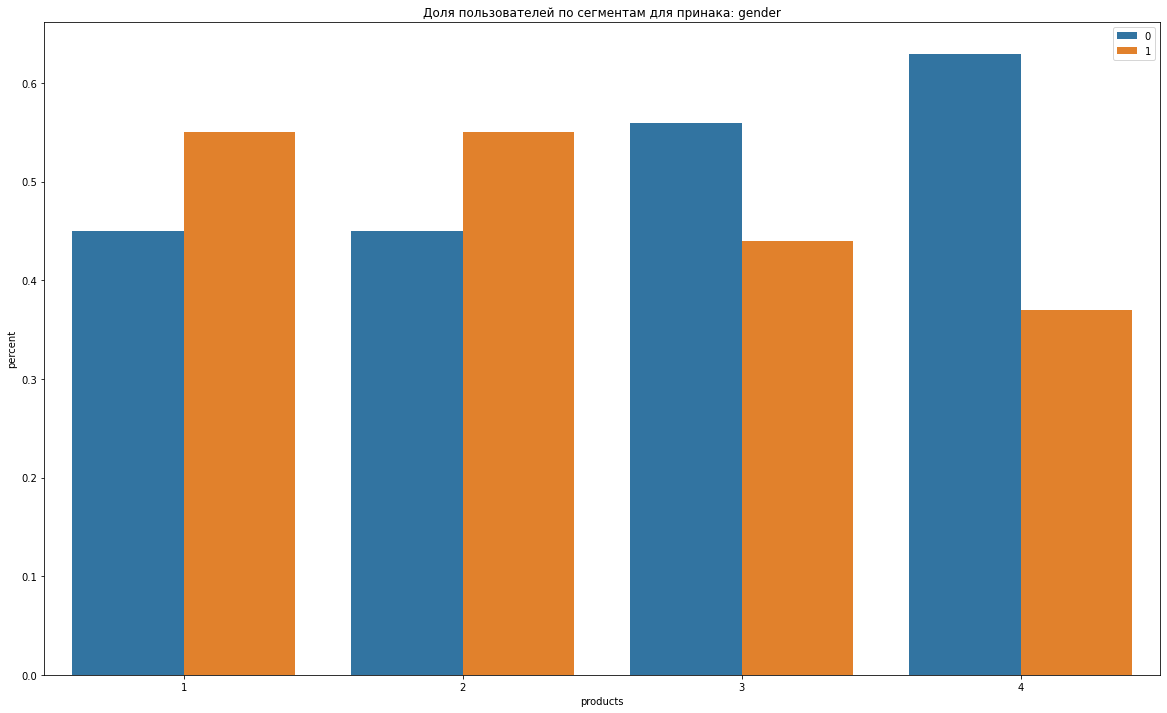


Доля пользователей по сегментам для принака: credit_card


,products,credit_card,segment_for_hist,percent
0,1,0,1506,0.30
1,1,1,3578,0.70
2,2,0,1344,0.29
3,2,1,3246,0.71
4,3,0,76,0.29
5,3,1,190,0.71
6,4,0,19,0.32
7,4,1,41,0.68


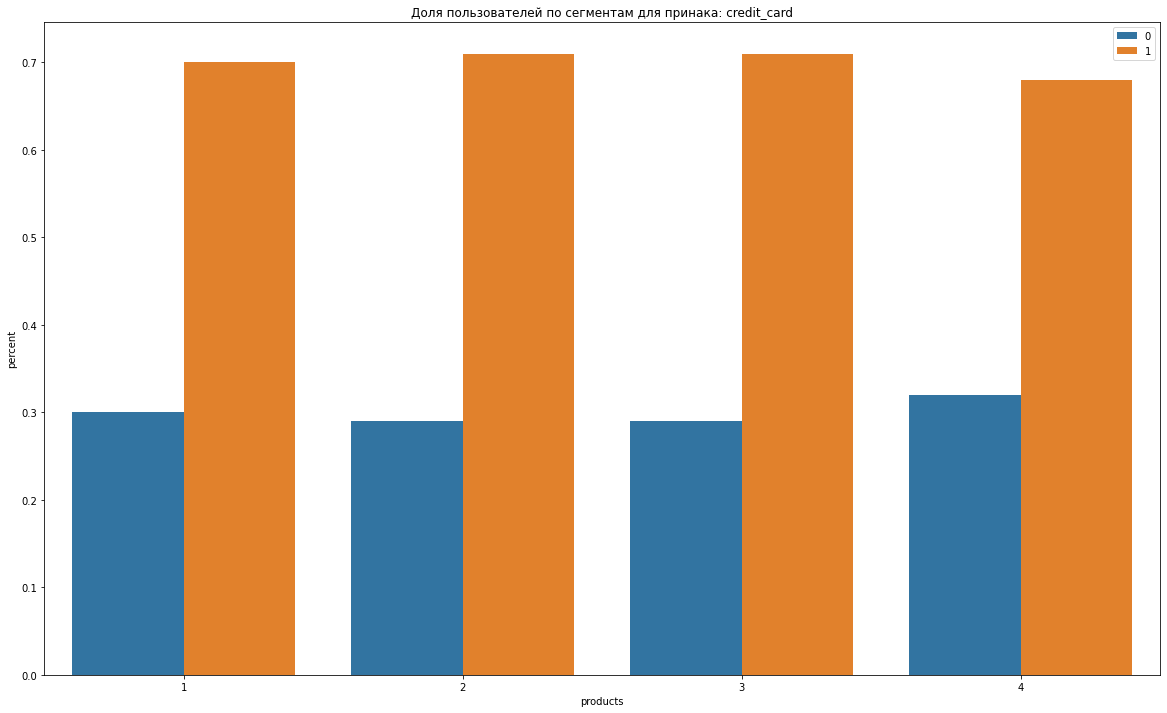


Доля пользователей по сегментам для принака: loyalty


,products,loyalty,segment_for_hist,percent
0,1,0,2521,0.50
1,1,1,2563,0.50
2,2,0,2144,0.47
3,2,1,2446,0.53
4,3,0,153,0.58
5,3,1,113,0.42
6,4,0,31,0.52
7,4,1,29,0.48


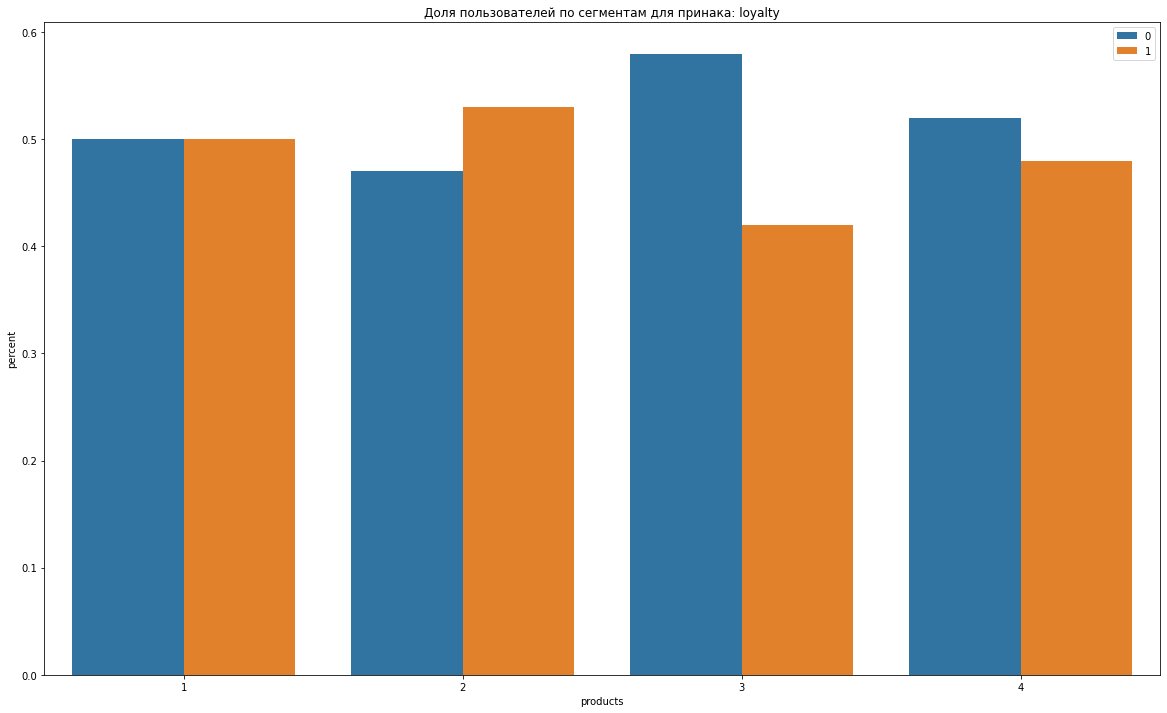


Доля пользователей по сегментам для принака: churn


,products,churn,segment_for_hist,percent
0,1,0,3675,0.72
1,1,1,1409,0.28
2,2,0,4242,0.92
3,2,1,348,0.08
4,3,0,46,0.17
5,3,1,220,0.83
6,4,1,60,1.00


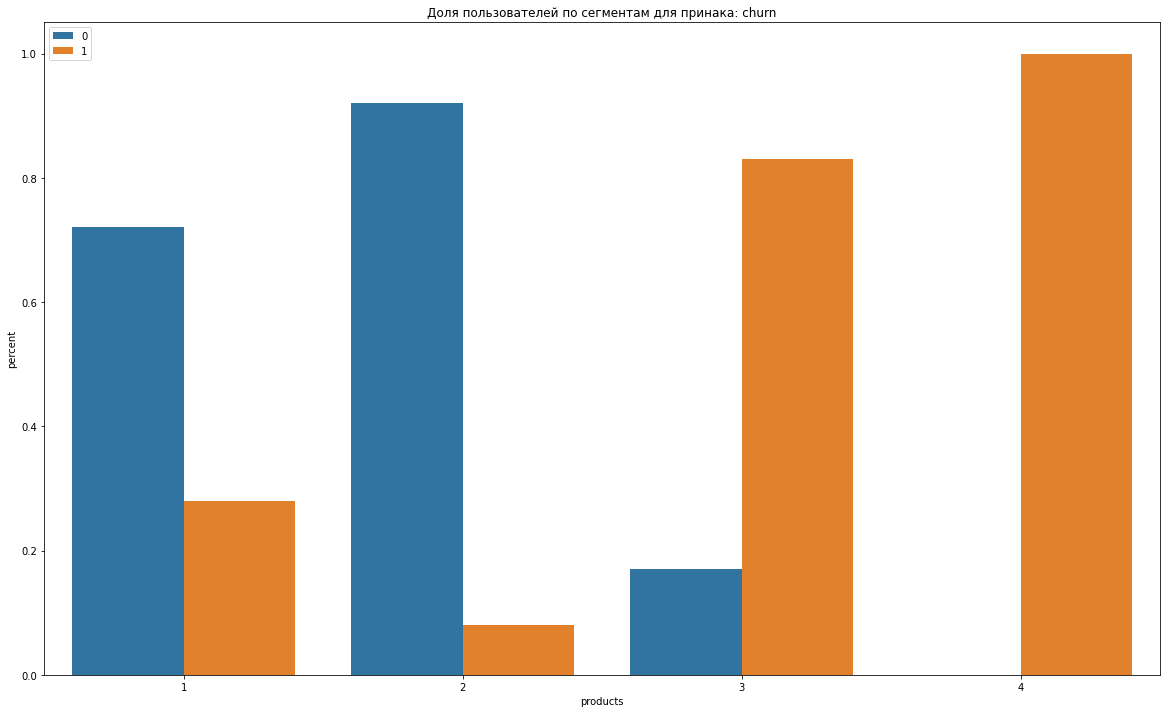

In [36]:
#применяем функцию
histograms(bank_df, sign, 20, 12)

Мы видим следующие закономерности:

**1)** Признак **`city`** -  город

Для всех сегментов наиболее распространенным городом является Ярославль. Для 1, 3 и 4 сегментов вторым по распространенности городом выступает Ростов Великий. Второй сегмент же чуть более распространен в Рыбинске.

**2)** Признак **`gender`** -  пол

Для 3 и 4 сегментов больше женщин, а для 1 и 2 сегментов - мужчины.

**3)** Признак **`credit_card`** -  есть ли кредитная карта

У всех сегментов преобладают клиенты, обладающие кредитными картами. Соотношение тех, у кого они есть, и тех, у кого их нет, для всех сегментов примерно одинаково - 70 на 30.

**4)** Признак **`loyalty`** -  активный клиент

Для 1-го сегмента количество активных и неактивных клиентов одинаково (соотношение 50 на 50). Для 2-го сегмента больше тех, кого можно назвать активными пользователями (53%). Клиенты 3 сегмента более неактивны (процент неактивности для них – 58).  Среди клиентов 4 сегмента чуть больше тех, кого можно назвать неактивными (52%). 

**5)** Признак **`churn`** -  ушёл или нет

По поводу оттока можно сказать, что для 1-го сегмента уходят только 28% клиентов. Для 2-го сегмента это число снижается до 8%. 3 и 4 кластеры среди всех наиболее подвержены оттоку – если для 3 сегмента процент ушедших составляет 83, то для 4 сегмента все 100. Это нездорово. Очень странно, что клиенты с 4 и более продуктами всегда уходят.

В целом можем сделать вывод о том, что сегменты крайне слабо влияют на признаки клиентов, однако некоторые закономерности мы смогли обнаружить. Можем подтвердить это с помощью матрицы корреляций.

Чтобы не потерять столбец города, закодируем его и уже тогда выведем матрицу корреляции

In [38]:
#перекодируем город
encoder = LabelEncoder()
bank_df['city'] = encoder.fit_transform(bank_df['city'])

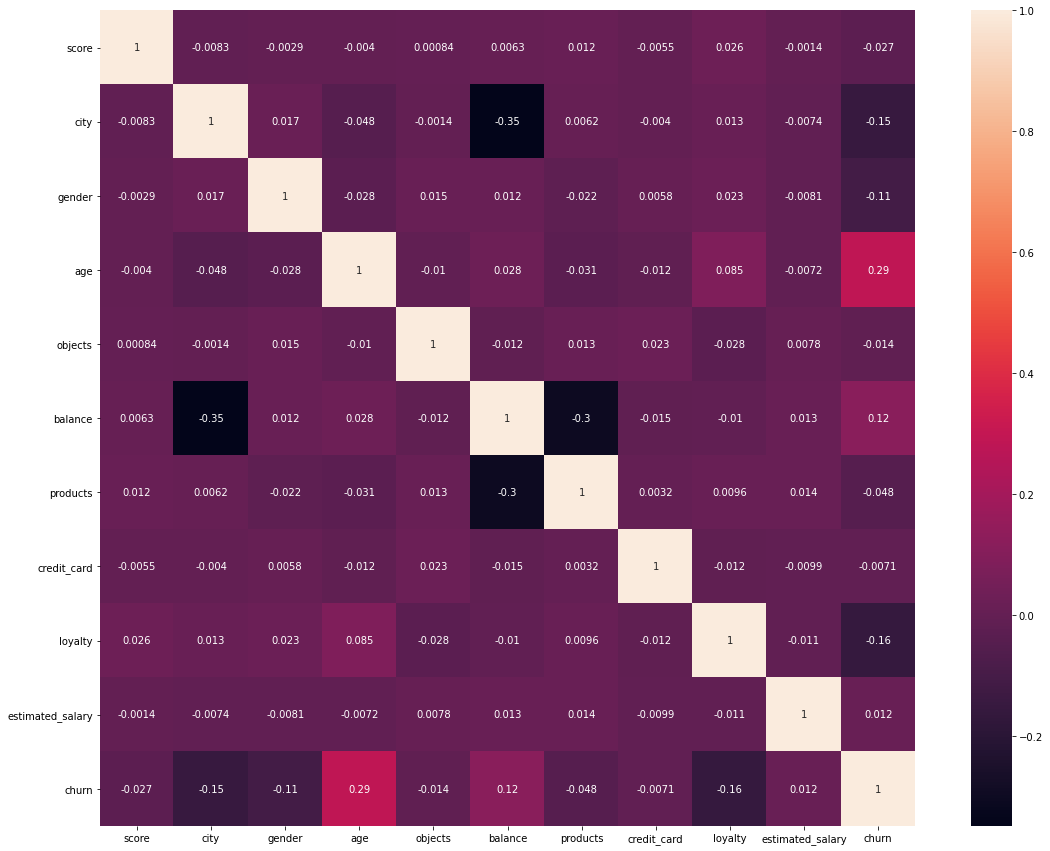

In [39]:
#размер таблицы
plt.figure(figsize = (20,15))
#матрица корреляции
corr_m = bank_df.drop(['user_id'], axis=1).corr()
# нарисуем heatmap
sns.heatmap(corr_m, square = True, annot = True, )
plt.show()


Как мы и говорили, какой-либо значимой зависимости между количество продуктов и иных признаков клиента нет. Есть лишь небольшая отрицательная зависимость с балансом, которая, скорее всего вызвана нашей заменой пропусков, которая привела к тому, что появились нули в балансе. Если наша гипотеза верна, то есть вероятность того, что у клиентов с большим количеством продуктов чаще встречаются 0 на счету. Однако это тоже не факт, поскольку сегменты крайне сильно различаются по количественному составу, а потому 14 нулей для 4 сегмента - это уже целых 23%, а для 1 сегмента эта же цифра - меньше 1%. Проблема банка - неумение заинтересовать клиента к покупке дополнительных продуктов компании. В остальных случаях зависимости крайне славбые.
Кодировка города нам особо ничего не дала, поскольку зависимости между городом и сегментом нет - мы увидели только, что существует небольшая зависимость города и баланса - но это из-за пропусков, количество которых как раз-таки и зависит от города.

Теперь посмотрим на коэффициенты корреляции Phik:

interval columns not set, guessing: ['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn']


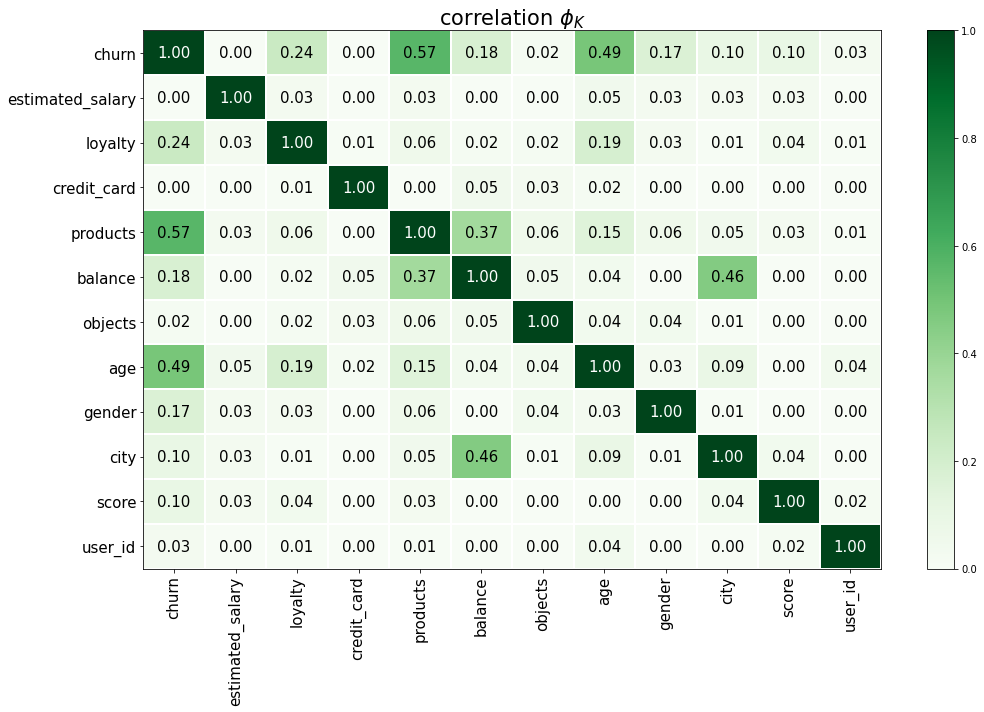

In [40]:
#создаем продвинутую матрицу и визуализируем ее
phik_overview = bank_df.phik_matrix().round(2)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(15, 10))
plt.tight_layout()

Более продвинутая визуализация дает нам представление все-таки о наличии зависимостей.
Мы замечаем некоторую зависимость сегмента с:

1) Возрастом (0.15). Звучит правдоподобно, поскольку мы видели, что была небольшая зависимость по сегментами.

2) Балансом (0.37). Зависимость все еще не самая высокая, но существенная. Связано это с тем, что в датасете есть пропуски, которые искажают баланс, а количество их зависит от сегмента.

3) Отток (0.57). Не самая сильная зависимость, но уже заметная. И это справедливо, поскольку пользователи 4 сегмента абсолютно полностью ушли. 

Эта матрица корреляции уже выглядит более правдоподобной. Значительной зависимости между сегментами и признакми нет, однако признак оттока все-таки имеет связь с сегментом, которую нельзя не заметить.

# Шаг 4. Статистический анализ данных
<a id='eight'></a>

Теперь нам предстоит проверка гипотез.

## Первая гипотеза
<a id='nine'></a>

Первая наша гипотеза задана ТЗ и выглядит так:
Различие дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Проверять гипотезу мы будем с помощью непараметрического теста Уилкоксона-Манна-Уитни

**Нулевая гипотеза будет звучать так:**

Доходы клиентов, которые пользуются одним продуктом банка и доходы клиентов, которые пользуются двумя продуктами банка, не различаются.

**Альтернативная же гипотеза будет звучать так:**

Доходы клиентов, которые пользуются одним продуктом банка и доходы клиентов, которые пользуются двумя продуктами банка, различаются.

In [41]:
#выделяем отдельно сегменты с 1 и 2 продуктами
bank_df_1 = bank_df.query('products == 1')['estimated_salary']
bank_df_2 = bank_df.query('products == 2')['estimated_salary']

In [42]:
# критический уровень статистической значимости - если p-value окажется меньше него - отвегнем гипотезу
alpha = .01 
#применяем t-тест
result = st.mannwhitneyu(bank_df_1, bank_df_2)


#выводим на экран уровень значимости для этой статистики 
print('p-значение: ', result.pvalue)

#проверяем гипотезу
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.40796286066317733
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**Вывод**

Мы видим, что значение p-value довольно велико и составляет 0.41. Следовательно, вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна, равен 41%. 
По этой причине мы не опровергаем нулевую гипотезу, говорящей нам о том, что, различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним **нет**. Мы не смогли найти данных, опровергающих ее.

Следовательно, гипотеза о том, что доход клиентов, пользующихся одним продуктом, отличается от дохода, пользуещегося двумя продуктами -будет отвергнута. Мы смогли найти данные, опровергающие ее.


## Вторая гипотеза
<a id='ten'></a>

Теперь нам предстоит сформировать вторую гипотезу.

Как мы уже сказали, заработные платы между сегментами равны. Проверим, есть ли разница между заработной платой тех, кто пользовался минимальным количеством продуктов, и теми, кто брал максимум от банка. Сравним заработные платы клиентов 1 и 4 сегмента.

Проверять гипотезу мы будем с помощью t-теста

**Нулевая гипотеза будет звучать так:**

Доходы клиентов, которые пользуются одним продуктом банка и доходы клиентов, которые пользуются четырьмя продуктами банка, не различаются.

**Альтернативная же гипотеза будет звучать так:**

Доходы клиентов, которые пользуются одним продуктом банка и доходы клиентов, которые пользуются четырьмя продуктами банка, различаются.

In [43]:
#выделяем отдельно сегменты с 4 продуктами
bank_df_4 = bank_df.query('products == 4')['estimated_salary']

In [44]:
# критический уровень статистической значимости - если p-value окажется меньше него - отвегнем гипотезу
alpha = .05 
#применяем t-тест
result = st.mannwhitneyu(
    bank_df_1, 
    bank_df_4)
#выводим на экран уровень значимости для этой статистики 
print('p-значение: ', result.pvalue)


#проверяем гипотезу
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.47322472276274097
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**Вывод**

Мы видим, что значение p-value довольно велико и составляет 0.47. Следовательно, вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна, равен 47%. 
По этой причине мы не опровергаем нулевую гипотезу, говорящей нам о том, что, различия дохода между теми клиентами, которые пользуются четырьмя продуктами банка, и теми, которые пользуются одним **нет**. Мы не смогли найти данных, опровергающих ее.

Следовательно, гипотеза о том, что доход клиентов, пользующихся одним продуктом, отличается от дохода, пользуещегося четырьмя продуктами -будет отвергнута. Мы смогли найти данные, опровергающие ее.


Какой вывод мы можем сделать?
Заработные платы клиентов, которые пользовались 1 продуктом, 2 или 4 похожи. То есть, то, сколькими продуктами пользуется клиент, не зависит от сегмента, которые мы сформировали в Шаге 3. Об этом мы уже говорили ранее, но сейчас подтвердили окончательно.

# Шаг 5. Подведение итогов и формирование рекомендаций для банка
<a id='eleven'></a>

**В ходе выполнения работы, мы смогли решили следующие задачи:**
    
1) Встроили файл в проект и прочитали его, сделалав предварительные выводы относительно датасета.

2) Провели предобработку данных, в ходе которой мы избавились от пропусков, привели данные к нужному типу, привели названия столбцев к правилам хорошего стиля, а также разобрались с типом данных.

3) Провели исследовательский анализ данных, в ходе которого сегментировали пользователей и смогли посмотреть на то, как распределились признаки в зависимости от сегмента. В итоге мы поняли, что сегменты лишь отдельно взятым небольшим числом признаков отличается друг от друга. Во многом же они схожи.

4) Провели статистический анализ данных, в ходе которого мы проверили две гипотезы, одна из которых была дана нам в ТЗ, а другую мы сами сформировали. Проверка гипотез подтвердила наши выводы, сделанные при исследовательском анализе данныхю


Теперь мы можем сформировать каждый сегмент и дать рекомендации для него.

**Отдельные рекомендации для каждого сегмента:**

Теперь мы можем построить портреты клиентов сегмента, опираясь на данные.

**Segment 1**

**Описание:**

1) Наиболее распространены в Ярославле. В других городах представлены также. 

2) Больше Мужчин.

3) У 70%  клиентов есть кредитные карты.

4) Половина клиентов активна, а другая - нет.

5) Отток довольно низкий - около 28%.

6) Баллы кредитного скоринга в среднем на одного клиента составляют 650

7) Клиенты в среднем в возарсте от 36 до 37 лет.

8) В среднем 5 объектов в собственности находится 

9) Довольно высокий баланс в сравнении с предыдущими сегментами. Довольно велико значение пропусков, которые мы заменили 0. Без учета пропусков баланс такой же, как и остальных.


10) Заработная плата чуть хуже остальных сегментов. Однако это чисто символическое различие.

**Рекомендация:**


1) Нужно омолаживать клиентов. Средний возраст для данного сегмента 36-37 лет. Это слишком много. Более молодых клиентов у сегмента немного.

2) Нужно расширять представительство в Ростове и Рыбинске. Мы видим, что в сравнении с Ярослвлем, в этих городах клиентов первого сегмента не так много. Возможно проведение каких-либо акций.

3) Целых 50% клиентов являютсянеактивными, а это большая цифра. Потому нужно повышать активность клиентов сегмента.

4) Отток не самый высокий, но все-таки он есть - нужно так или иначе сокращать его.

5) Нужно увеличивать процент владельцев кредиток.

6) Привлекать нужно женщин к пользованием данным количеством продукции.

Теперь перейдем ко 2 сегменту

**Segment 2**

**Описание:**

1) Наиболее распространены в Ярославле. В других городах представлены также. 

2) Больше Мужчин.

3) У 70%  клиентов есть кредитные карты.

4) Чуть больше активных клиентов - 53%.

5) Отток крайне низкий - около 8%.

6) Баллы кредитного скоринга в среднем на одного клиента составляют 650

7) Клиенты в среднем в возарсте от 38 до 39 лет.

8) В среднем 5 объектов в собственности находится - но в сравнении с другими кластерами - чуть меньше.

9) Самый низкий баланс среди всех клиентов. Крайне большое количество клиентов, которые имели нулевой баланс (пропуски) и очень мало тех, кто имел высокий баланс. Без учета пропусков баланс такой же, как и остальных.


10) Заработная плата чуть хуже сегментов 3 и 4, но лучше 1 сегмента.

**Рекомендация:**


1) Нужно также омолаживать клиентов. Клиенты 2 сегмента еще более стары, чем клиенты 1 сегмента.

2) Отток совершенно низкий. Возможно для клиентов с 2 продуктами существуют определенные акции или промо, которые и влияют на низкий отток, который значительно ниже среди сегментов.

3) Проблемы с пропусками или нулевым балансом. Самое большое количество пропусков находится в данном сегменте. Нужно привлекать клиентов к тому, чтобы он держал деньги на карте и не терял интереса к продукту.

4) Активных клиентов, конечно, больше, но все-таки нужно повышать активность, поскольку 53% - не эталон.

5) Нужно расширять представительство в Ростове и Рыбинске. Мы видим, что в сравнении с Ярослвлем, в этих городах клиентов первого сегмента не так много. Возможно проведение каких-либо акций.

6) Привлекать нужно женщин к пользованием данным количеством продукции.

7) Нужно увеличивать процент владельцев кредиток.

**Segment 3**

**Описание:**

1) Наиболее распространены в Ярославле. В других городах представлены также. 

2) Чуть больше женщин, чем мужчин.

3) У 70%  клиентов есть кредитные карты.

4) Больше неактивных клиентов - 58%.

5) Отток крайне высокий - около 83%.

6) Баллы кредитного скоринга в среднем на одного клиента составляют 650

7) Клиенты в среднем в возарсте от 42 до 43 лет.

8) В среднем 5 объектов в собственности находится - но в сравнении с другими кластерами - чуть меньше.

9) Относительно немаленький баланс, но число клиентов с 0 тянет баланс на низкий уровень. Без учета пропусков баланс такой же, как и остальных.

10) Заработная плата такая же, как и у остальных сегментов.


**Рекомендация:**

1) Если клиенты 1 и 2 сегмента довольно взрослые, то клиенты данного сегмента нуждаются в омоложении. Крайне невелик процент молодых клиентов - нужно их привлекать, создавать продукцию для более молодежного населения.

2) Нужно распространить побольше продукции в Рыбинске. В остальных городах все равномерно.

3) Ужасные проблемы с оттоком - 83% слишком велико. Лишь 17% клиентов остаются с банком. Так, банк теряет 83 клиента из 100, которые купили более 2 продуктов. Это очень странно. Безумный скачок от 2 сегмента к 3. Возможно у банка плохая поддержка продукции. Нужно с этим что-либо делать. 

4) Довольно много пропусков, которые тянут баланс на дно. Нужно сделать так, чтобы клиенты хранили деньги на картах.

5) Нужно увеличивать процент владельцев кредиток.

6) Нужно привлекать мужчин к большему количеству продуктов.

7) Необходимо повышать активность пользователей.

**Segment 4**

**Описание:**


1) Наиболее распространены в Ярославле и Ростове Великом.

2) Женщин значительно выше, чем мужчин.

3) У 70%  клиентов есть кредитные карты.

4) Чуть неактивных клиентов - 52%.

5) Все пользователи уходят от банка.

6) Баллы кредитного скоринга в среднем на одного клиента составляют 650

7) Самые старые клиенты - 45 лет.

8) В среднем 5 объектов в собственности находится.

9) Самый высокий баланс, как с учетом, так и без учета пропусков.

10) Самая высокая заработная плата.


**Рекомендация:**

1) Самые старые клиенты среди всех сегментов. Потому сегмент нуждается в срочном омолаживании.

2) Нужно увеличивать процент кредитных карт

3) Много неактивных пользователей, а потому нужно увеличивать активность.

4) Необходимо увеличивать процент мужчин в пользовании продуктами, поскольку они реже пользуются более, чем 2 продуктами.

5) Нужно распространить побольше продукции в Рыбинске. В остальных городах все равномерно.

6) ВСЕ пользователи уходят. Это безумная статистика. Большее количество продуктов приносит больше прибыли только тогда, когда клиенты пользуются этими продуктами. В нашем банке это не так. Необходимо провести опросы и выяснить, почему клиенты уходят. После этого необходимо немедленно устранить существующие проблемы. Не может быть так, чтобы это была чистая случайность - тут закономерность, которая связана с каким-то сбоем в системе или некорректной работой сотрудников.

**В результате проведенного исследования мы можем сделать определенные рекомендации для банка:**

**1)** Нужно распространять большее количество продуктов. Соотношение клиентов по количеству у них продуктов сильно различается в худшую сторону. Можно развивать “пакеты” продуктов, когда несколькими продуктами пользоваться удобнее, чем 1.

**2)** Нужно разобраться с пропусками. Мы точно не можем сказать, как появились пропуски, но если это была ошибка системы, то нужно ее исправить. Если пропуски=0, то нужно сделать факт держания средств на счету более выгодным, поскольку, если клиенты не будут хранить деньги на счету, то у них может потеряться интерес к счету и банку.

**3)** Нужно распространять продукты банка среди молодого населения. Мы видели, что средний возраст клиент для всех сегментов свыше 35 лет, а это граница “молодежного возраста”.

**4)** Нужно распространять продукты банка в Рыбинске и Ростове Великом, поскольку в сравнении с распространением в Ярославле, в других городах их значительно мало. В большей степени это касается 1, 2 и особенно 4 сегментов. В 3 мы видим некоторую гармонию.

**5)** Нужно распространять больше продукции среди мужчин – они в большей степени пользуются 1 и 2 продуктами.

**6)** Нужно больше распространять кредитных карт – 70% для всех сегментов есть хороший результат, но можно его улучшить.

**7)** Нужно работать над активность пользователей. Лишь среди клиентов с 2 продуктами активных клиентов больше. Во всех остальных случаев их либо равное число, либо неактивных больше. Нужно повышать активность различными акциями и т.д.

**8)** Существует большая проблема с оттоком. Мы видим, что клиенты с 3 и 4 продуктами крайне сильно подвержены оттоку. Больше продуктов = больше прибыли для банка. А мы видим, что клиенты, которые могут принести больше прибыли банку, практически всегда уходят. Нужно их задерживать – предлагать акции, скидки и подарки. Возможно в системе банка существуют какие-то проблемы, приводящие к безумному оттоку. Если так, нужно их решить.
